In [1]:
import tensorflow as tf
from tensorflow. keras import models, layers 
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE )
    

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names

In [5]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 2 1 1 2 1 1 2 1 1 0 1 1 0 1 1 1 0 1 2 0 0 0 0 0 1 0 1 0 1 1]


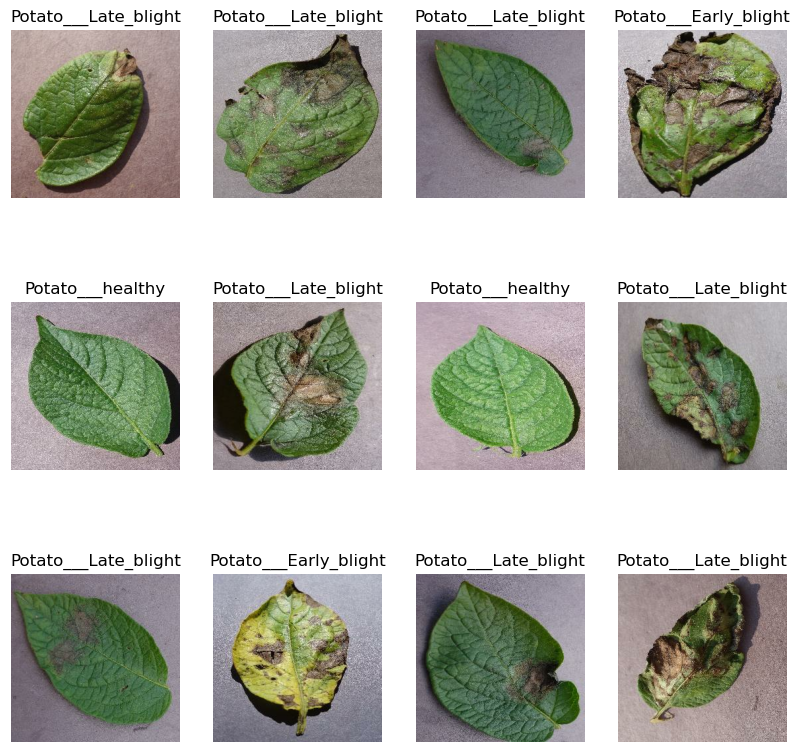

In [7]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
#80% ==>training
#20% ==>10% validation, 10% test

In [9]:
train_size = 0.8
test_size = 0.1
val_size = 0.1
shuffle_size = 10000

In [10]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds. take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    print('It worked')
    
    return train_ds, val_ds, test_ds

In [11]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset,train_size,val_size,test_size,shuffle =True,)

It worked


In [12]:
print(len(train_ds),len(val_ds),len(test_ds))

54 6 8


In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing (IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling (1.0/255)
    ])

In [15]:
data_augmentation = tf.keras.Sequential([
layers.experimental.preprocessing.RandomFlip ("horizontal_and_vertical"),
layers.experimental.preprocessing.RandomRotation(0.2),
])

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3 

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = input_shape)

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [23]:
model. compile(
    optimizer= 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
model.fit(
 train_ds,
 epochs = EPOCH,
 batch_size = BATCH_SIZE,
 verbose = 1,
 validation_data = val_ds,
)

Epoch 1/50
54/54 [==============================] - 82s 1s/step - loss: 0.9133 - accuracy: 0.4728 - val_loss: 0.8938 - val_accuracy: 0.4479
Epoch 2/50
54/54 [==============================] - 87s 2s/step - loss: 0.7618 - accuracy: 0.5718 - val_loss: 0.5313 - val_accuracy: 0.7292
Epoch 3/50
54/54 [==============================] - 77s 1s/step - loss: 0.4725 - accuracy: 0.7847 - val_loss: 0.3771 - val_accuracy: 0.8333
Epoch 4/50
54/54 [==============================] - 84s 2s/step - loss: 0.3310 - accuracy: 0.8617 - val_loss: 0.4495 - val_accuracy: 0.7812
Epoch 5/50
54/54 [==============================] - 100s 2s/step - loss: 0.3220 - accuracy: 0.8582 - val_loss: 0.3191 - val_accuracy: 0.8750
Epoch 6/50
54/54 [==============================] - 76s 1s/step - loss: 0.2473 - accuracy: 0.8953 - val_loss: 0.4708 - val_accuracy: 0.8281
Epoch 7/50
54/54 [==============================] - 65s 1s/step - loss: 0.2185 - accuracy: 0.9062 - val_loss: 0.1967 - val_accuracy: 0.9115
Epoch 8/50
54/54 [=

In [28]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 162ms/step - loss: 0.0526 - accuracy: 0.9844


In [31]:
history

import tensorflow as tf
from tensorflow. keras import models, layers 
import matplotlib.pyplot as plt
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 50
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE )
class_names = dataset.class_names
class_names
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
#80% ==>training
#20% ==>10% validation, 10% test
train_size = 0.8
test_size = 0.1
val_size = 0.1
shuffle_size = 10000
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,):
    ds_size = len(ds)
    i

In [33]:
history.params()

NameError: name 'history' is not defined

First image to predict:
1/1 [==============================] - 0s 194ms/step


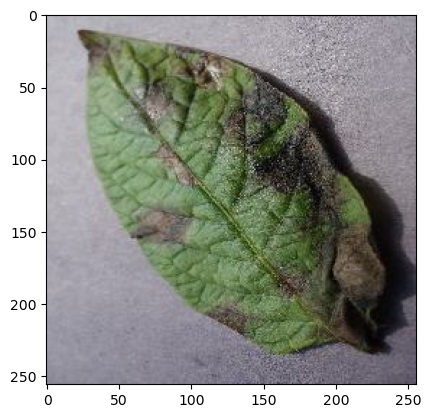

First image's actual label: Potato___Late_blight
predicted label: Potato___Late_blight


In [49]:
import numpy as np 

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    print("First image to predict:")
    batch_prediction = model.predict(images_batch)
    plt.imshow(first_image)
    plt.show()

    
    print("First image's actual label:", class_names[first_label.numpy()])
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [55]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 14ms/step


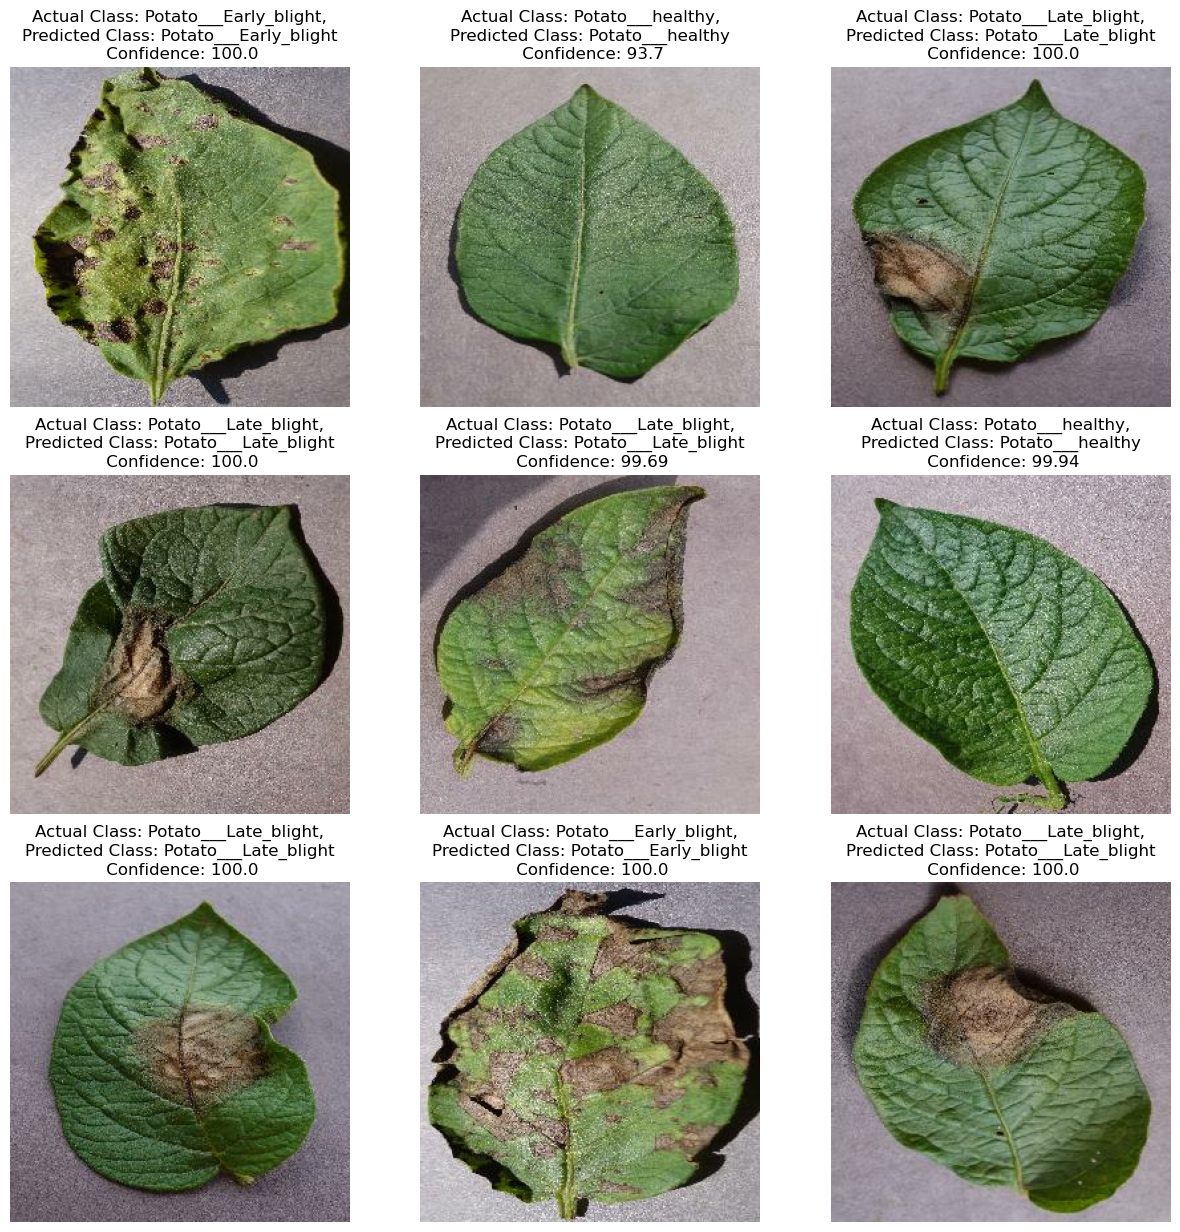

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f'Actual Class: {actual_class},\nPredicted Class: {predicted_class}\n Confidence: {confidence}')

        plt.axis("off")


In [68]:
model_version = 'patato' + str(2) + '.h5'
print(model_version)
model.save(f'models/{model_version}')

patato2.h5


/Users/mustafaninmacbooku/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
